<img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Vertical-SinFondo.png"
     align="right"
     width="150"/>

# **Segundo Examen Parcial**

## **Modelo de predicción lineal**

- Esteban Gomez Valerio
---

In [362]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.kernel_ridge import KernelRidge


In [363]:
df = pd.read_csv('Datos/datos_gente.csv')
df.head()

,Altura,Ancho,Pie
0,185,55,28.0
1,173,44,26.5
2,163,44,24.0
3,162,44,24.5
4,172,46,27.0


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Altura  18 non-null     int64  
 1   Ancho   18 non-null     int64  
 2   Pie     18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 560.0 bytes


In [365]:
fig1 = px.scatter(df, x="Altura", y="Ancho", 
                  title="Altura vs Ancho", 
                  labels={"Altura": "Altura (cm)", "Ancho": "Ancho (cm)"},
                  color_discrete_sequence=["blue"])

fig2 = px.scatter(df, x="Altura", y="Pie", 
                  title="Altura vs Pie", 
                  labels={"Altura": "Altura (cm)", "Pie": "Pie (cm)"},
                  color_discrete_sequence=["red"])

fig1.show()
fig2.show()

In [366]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['Ancho'], 
    y=df['Pie'], 
    z=df['Altura'],
    mode='markers',
    marker=dict(size=8, color=df['Altura'], colorscale='Viridis', opacity=0.8)
)])

fig.update_layout(
    title="Gráfica 3D: Altura vs Ancho vs Pie",
    scene=dict(
        xaxis_title="Ancho (cm)",
        yaxis_title="Pie (cm)",
        zaxis_title="Altura (cm)"
    )
)

fig.show()

## **Modelos Lineales**

### **Sampleo de Datos**

In [367]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [368]:
param_grid = {
    'n_components': range(1, 11),  
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],  
    'reg_covar': [1e-6, 1e-4, 1e-2, 1e-1]  
}

In [369]:
gmm = GaussianMixture(random_state=42)
grid_search = GridSearchCV(gmm, param_grid, scoring=None, cv=3, verbose=1)
grid_search.fit(df)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=GaussianMixture(random_state=42),
             param_grid={'covariance_type': ['full', 'tied', 'diag',
                                             'spherical'],
                         'n_components': range(1, 11),
                         'reg_covar': [1e-06, 0.0001, 0.01, 0.1]},
             verbose=1)

In [370]:
print("Mejores hiperparámetros encontrados:")
grid_search.best_params_

Mejores hiperparámetros encontrados:


{'covariance_type': 'diag', 'n_components': 2, 'reg_covar': 0.1}

In [371]:
best_gmm = grid_search.best_estimator_

In [372]:
synthetic_n = 50

In [373]:
synthetic_samples, _ = best_gmm.sample(synthetic_n)
synthetic_data = pd.DataFrame(synthetic_samples, columns=df.columns)

In [374]:
print("Datos sintéticos generados:")
synthetic_data.head()

Datos sintéticos generados:


,Altura,Ancho,Pie
0,169.377755,52.675202,27.698789
1,182.732899,47.947897,26.945256
2,172.778843,46.144754,24.989414
3,182.354433,55.289214,26.009484
4,173.680771,47.099251,26.778310


In [375]:
df.shape

(18, 3)

In [376]:
df_ori = df.copy()

In [377]:
df = pd.concat([synthetic_data, df])
df.shape

(68, 3)

In [378]:
fig1 = px.scatter(df, x="Altura", y="Ancho", 
                  title="Altura vs Ancho", 
                  labels={"Altura": "Altura (cm)", "Ancho": "Ancho (cm)"},
                  color_discrete_sequence=["blue"])

fig2 = px.scatter(df, x="Altura", y="Pie", 
                  title="Altura vs Pie", 
                  labels={"Altura": "Altura (cm)", "Pie": "Pie (cm)"},
                  color_discrete_sequence=["red"])

fig1.show()
fig2.show()

### **Modelo 1: Linnear Regression**

In [379]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [380]:
X = df_ori[['Pie', 'Ancho']]
y = df_ori['Altura']

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [382]:
model = LinearRegression(positive=True)
model.fit(X_train, y_train)

LinearRegression(positive=True)

In [383]:
y_pred = model.predict(X_test)

In [384]:
print(f'Shape de y_pred {y_pred.shape}')

Shape de y_pred (4,)


In [385]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'El r2: {r2:.3f}')
print(f'El rmse: {rmse:.3f}')

El r2: 0.846
El rmse: 3.635


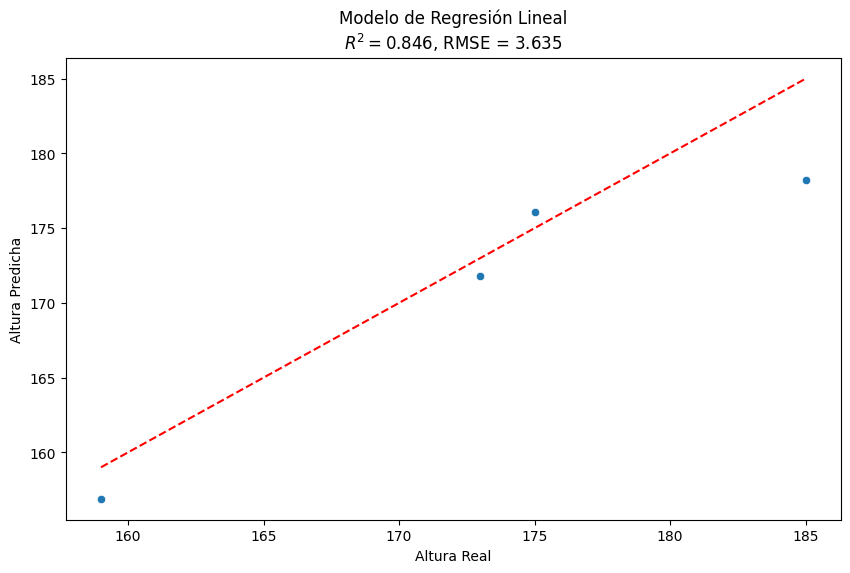

In [386]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea de identidad
plt.title(f"Modelo de Regresión Lineal\n$R^2 = {r2:.3f}$, RMSE = {rmse:.3f}")
plt.xlabel("Altura Real")
plt.ylabel("Altura Predicha")
plt.show()

In [387]:
model.coef_

array([4.26666667, 0.        ])

### **Modelo 2: Lineal Dividido**

In [388]:
altura_median = df['Altura'].median()

df_bajo = df[df['Altura'] <= altura_median]
df_alto = df[df['Altura'] > altura_median]

In [389]:
fig1 = px.scatter(df_bajo, x="Altura", y="Ancho", 
                  title="Altura vs Ancho Grupo Bajo", 
                  labels={"Altura": "Altura (cm)", "Ancho": "Ancho (cm)"},
                  color_discrete_sequence=["blue"])

fig2 = px.scatter(df_bajo, x="Altura", y="Pie", 
                  title="Altura vs Pie Grupo Bajo" , 
                  labels={"Altura": "Altura (cm)", "Pie": "Pie (cm)"},
                  color_discrete_sequence=["red"])

fig1.show()
fig2.show()

In [390]:
fig1 = px.scatter(df_alto, x="Altura", y="Ancho", 
                  title="Altura vs Ancho Grupo Alto", 
                  labels={"Altura": "Altura (cm)", "Ancho": "Ancho (cm)"},
                  color_discrete_sequence=["blue"])

fig2 = px.scatter(df_alto, x="Altura", y="Pie", 
                  title="Altura vs Pie Grupo Alto" , 
                  labels={"Altura": "Altura (cm)", "Pie": "Pie (cm)"},
                  color_discrete_sequence=["red"])

fig1.show()
fig2.show()

In [391]:
X_bajo = df_bajo[['Pie', 'Ancho']]
y_bajo = df_bajo['Altura']

X_alto = df_alto[['Pie', 'Ancho']]
y_alto = df_alto['Altura']

X_train_bajo, X_test_bajo, y_train_bajo, y_test_bajo = train_test_split(X_bajo, y_bajo, test_size=0.2, random_state=42)
X_train_alto, X_test_alto, y_train_alto, y_test_alto = train_test_split(X_alto, y_alto, test_size=0.2, random_state=42)

model_bajo = LinearRegression()
model_bajo.fit(X_train_bajo, y_train_bajo)

model_alto = LinearRegression()
model_alto.fit(X_train_alto, y_train_alto)

LinearRegression()

In [392]:
y_pred_bajo = model_bajo.predict(X_test_bajo)
y_pred_alto = model_alto.predict(X_test_alto)

In [393]:
fig_bajo = go.Figure()

fig_bajo.add_trace(go.Scatter(
    x=y_test_bajo, 
    y=y_pred_bajo,
    mode='markers',
    name='Datos (Bajo)',
    marker=dict(color='blue')
))

fig_bajo.add_trace(go.Scatter(
    x=y_test_bajo,
    y=y_test_bajo,
    mode='lines',
    name='Línea Ideal',
    line=dict(color='red', dash='dash')
))

fig_bajo.update_layout(
    title='Predicción Altura (Grupo Bajo)',
    xaxis_title='Altura Real',
    yaxis_title='Altura Predicha',
    width=700,
    height=500
)

fig_bajo.show()

In [394]:
fig_alto = go.Figure()

fig_alto.add_trace(go.Scatter(
    x=y_test_alto, 
    y=y_pred_alto,
    mode='markers',
    name='Datos (Alto)',
    marker=dict(color='green')
))

fig_alto.add_trace(go.Scatter(
    x=y_test_alto,
    y=y_test_alto,
    mode='lines',
    name='Línea Ideal',
    line=dict(color='red', dash='dash')
))

fig_alto.update_layout(
    title='Predicción Altura (Grupo Alto)',
    xaxis_title='Altura Real',
    yaxis_title='Altura Predicha',
    width=700,
    height=500
)

fig_alto.show()


In [395]:
def modelo_ensamble(x_row, umbral):
    if model_bajo.predict([x_row])[0] <= umbral:
        return model_bajo.predict([x_row])[0]
    else:
        return model_alto.predict([x_row])[0]

y_pred_ensamble = [modelo_ensamble(x, altura_median) for x in X_test.values]

r2_ensamble = r2_score(y_test, y_pred_ensamble)
rmse_ensamble = np.sqrt(mean_squared_error(y_test, y_pred_ensamble))

print(f'Ensamble R2: {r2_ensamble:.3f}, RMSE: {rmse_ensamble:.3f}')


Ensamble R2: 0.018, RMSE: 9.191


c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [396]:
fig_ensamble = go.Figure()

fig_ensamble.add_trace(go.Scatter(
    x=y_test, 
    y=y_pred_ensamble,
    mode='markers',
    name='Datos (Ensamble)',
    marker=dict(color='purple')
))

fig_ensamble.add_trace(go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='Línea Ideal',
    line=dict(color='red', dash='dash')
))

fig_ensamble.update_layout(
    title='Predicción Altura (Modelo Ensamble)',
    xaxis_title='Altura Real',
    yaxis_title='Altura Predicha',
    width=700,
    height=500
)

fig_ensamble.show()


### **Modelo 3: AnchoPie**

In [397]:
df_AnchoPie = df.copy()
df_AnchoPie['AnchoPie'] = df_AnchoPie['Pie'] * df_AnchoPie['Ancho']
df_AnchoPie.head()

,Altura,Ancho,Pie,AnchoPie
0,169.377755,52.675202,27.698789,1459.039310
1,182.732899,47.947897,26.945256,1291.968365
2,172.778843,46.144754,24.989414,1153.130366
3,182.354433,55.289214,26.009484,1438.043923
4,173.680771,47.099251,26.778310,1261.238326


In [398]:
fig1 = px.scatter(df_AnchoPie, x="Altura", y="AnchoPie", 
                  title="Altura vs AnchoPie", 
                  labels={"Altura": "Altura (cm)", "AnchoPie": "AnchoPie"},
                  color_discrete_sequence=["blue"])

fig1.show()

In [399]:
X_anchopie = df_AnchoPie[['AnchoPie']]
y_anchopie = df_AnchoPie['Altura']

X_train_anchopie, X_test_anchopie, y_train_anchopie, y_test_anchopie = train_test_split(X_anchopie, y_anchopie, test_size=0.2, random_state=42)

In [400]:
modelo_anchopie = LinearRegression()
modelo_anchopie.fit(X_train_anchopie, y_train_anchopie)

LinearRegression()

In [401]:
y_pred_anchopie = modelo_anchopie.predict(X_test_anchopie)

In [402]:
r2_anchopie = r2_score(y_test_anchopie, y_pred_anchopie)
rmse_anchopie = np.sqrt(mean_squared_error(y_test_anchopie, y_pred_anchopie))
print(f'Ensamble R2: {r2_anchopie:.3f}, RMSE: {rmse_anchopie:.3f}')

Ensamble R2: 0.365, RMSE: 6.150


### **Modelo 4: ElasticNet**

In [403]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

X = df[['Pie', 'Ancho']]
y = df['Altura']

X_train_net, X_test_net, y_train_net, y_test_net = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet(max_iter=10000))
])

In [404]:
param_grid = {
    'model__alpha': np.logspace(-5, 2, 50),       # 50 valores desde 1e-5 hasta 1e2
    'model__l1_ratio': np.linspace(0, 1, 50)       # 50 valores entre 0 y 1 (Ridge ←→ Lasso)
}

In [405]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1  
)

grid_search.fit(X_train_net, y_train_net)


Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+03, tolerance: 5.180e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', ElasticNet(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04,...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='r2', verbose=2)

In [406]:
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Mejores hiperparámetros:
{'model__alpha': np.float64(0.1389495494373136), 'model__l1_ratio': np.float64(0.0)}


In [407]:
y_pred_elastic = grid_search.predict(X_test_net)

r2_elastic = r2_score(y_test_net, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y_test_net, y_pred_elastic))

print(f"ElasticNet R2: {r2_elastic:.4f}, RMSE: {rmse_elastic:.4f}")

ElasticNet R2: 0.4247, RMSE: 5.8537


In [408]:
fig_elastic = go.Figure()

fig_elastic.add_trace(go.Scatter(
    x=y_test, 
    y=y_pred_elastic,
    mode='markers',
    name='ElasticNet Pred',
    marker=dict(color='orange')
))

fig_elastic.add_trace(go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='Línea Ideal',
    line=dict(color='red', dash='dash')
))

fig_elastic.update_layout(
    title='ElasticNet con GridSearch (Malla Amplia)',
    xaxis_title='Altura Real',
    yaxis_title='Altura Predicha',
    width=700,
    height=500
)

fig_elastic.show()


### **Modelo 5: Pie Coef_ Intercep_**

In [619]:
X = df_ori[['Pie']]
y = df_ori['Altura']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size=0.2, random_state=42)

In [620]:
Linear_model_coeffs = LinearRegression()
Linear_model_coeffs.fit(X_train_5, y_train_5)

LinearRegression()

In [621]:
y_pred_pos = Linear_model_coeffs.predict(X_test_5)

In [622]:
r2_pos = r2_score(y_test_5, y_pred_pos)
rmse_pos = np.sqrt(mean_squared_error(y_test_5, y_pred_pos))

print(f"Modelo 5 (positive=True) - R2: {r2_pos:.4f}, RMSE: {rmse_pos:.4f}")

Modelo 5 (positive=True) - R2: 0.8464, RMSE: 3.6350


In [623]:
original_coef = Linear_model_coeffs.coef_.copy()
original_intercept = Linear_model_coeffs.intercept_


In [624]:
print(f'Los coeficientes son: {Linear_model_coeffs.coef_}')
print(f'El Intercepto es: {Linear_model_coeffs.intercept_}')

Los coeficientes son: [4.26666667]
El Intercepto es: 58.761904761904745


In [625]:
# Datos de entrada para la gráfica
x_range = np.linspace(X['Pie'].min(), X['Pie'].max(), 100).reshape(-1, 1)
y_line = Linear_model_coeffs.predict(x_range)

# Crear la figura
fig_model5 = go.Figure()

# Scatter de datos reales
fig_model5.add_trace(go.Scatter(
    x=X['Pie'], 
    y=y,
    mode='markers',
    name='Datos reales',
    marker=dict(color='blue')
))

# Línea del modelo
fig_model5.add_trace(go.Scatter(
    x=x_range.flatten(),
    y=y_line,
    mode='lines',
    name='Línea del modelo',
    line=dict(color='red')
))

# Layout
fig_model5.update_layout(
    title='Modelo 5: Regresión Lineal (positive=True)\nAltura vs Pie',
    xaxis_title='Tamaño del Pie (cm)',
    yaxis_title='Altura (cm)',
    width=700,
    height=500
)

fig_model5.show()


c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [626]:
coef_range = np.linspace(original_coef[0] - 0.2, original_coef[0] + 0.2, 100)
intercept_range = np.linspace(original_intercept - 5, original_intercept + 5, 100)

In [627]:
best_r2 = -np.inf
best_rmse = np.inf
best_coef = None
best_intercept = None

for coef in coef_range:
    for intercept in intercept_range:
        y_pred_custom = X_test_5['Pie'] * coef + intercept
        r2 = r2_score(y_test_5, y_pred_custom)
        rmse = np.sqrt(mean_squared_error(y_test_5, y_pred_custom))

        if r2 > best_r2:  # puedes usar otra lógica si priorizas bajo RMSE
            best_r2 = r2
            best_rmse = rmse
            best_coef = coef
            best_intercept = intercept

print(f"Mejor combinación encontrada:")
print(f"Coeficiente: {best_coef:.4f}")
print(f"Intercepto: {best_intercept:.4f}")
print(f"R2: {best_r2:.4f}, RMSE: {best_rmse:.4f}")

Mejor combinación encontrada:
Coeficiente: 4.4667
Intercepto: 55.7821
R2: 0.9074, RMSE: 2.8222


In [628]:
# Línea de mejor ajuste
y_line_best = x_range.flatten() * best_coef + best_intercept

fig_best = go.Figure()

# Datos reales
fig_best.add_trace(go.Scatter(
    x=X['Pie'], y=y,
    mode='markers',
    name='Datos reales',
    marker=dict(color='blue')
))

# Línea best fit
fig_best.add_trace(go.Scatter(
    x=x_range.flatten(), y=y_line_best,
    mode='lines',
    name='Mejor línea ajustada',
    line=dict(color='green')
))

fig_best.update_layout(
    title='Línea ajustada manualmente (GridSearch de coef/intercept)',
    xaxis_title='Tamaño del Pie (cm)',
    yaxis_title='Altura (cm)',
    width=700,
    height=500
)

fig_best.show()


### **Modelo 6: Coef_ Intercep_**

In [635]:
X = df_ori[['Pie', 'Ancho']]
y = df_ori['Altura']

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, test_size=0.2, random_state=42)

In [636]:
Linear_model_2D = LinearRegression()
Linear_model_2D.fit(X_train_6, y_train_6)

LinearRegression()

In [637]:
y_pred_2D = Linear_model_2D.predict(X_test_6)

In [638]:
r2_2D = r2_score(y_test_6, y_pred_2D)
rmse_2D = np.sqrt(mean_squared_error(y_test_6, y_pred_2D))

print(f"Modelo 6 - R2: {r2_2D:.4f}, RMSE: {rmse_2D:.4f}")

Modelo 6 - R2: 0.8458, RMSE: 3.6414


In [639]:
coef_pie = Linear_model_2D.coef_[0]
coef_ancho = Linear_model_2D.coef_[1]
intercept = Linear_model_2D.intercept_

print(f"Coef Pie: {coef_pie:.4f}, Coef Ancho: {coef_ancho:.4f}, Intercepto: {intercept:.4f}")

Coef Pie: 4.2756, Coef Ancho: -0.0042, Intercepto: 58.7259


In [ ]:
pie_range = np.linspace(X['Pie'].min(), X['Pie'].max(), 50)
ancho_range = np.linspace(X['Ancho'].min(), X['Ancho'].max(), 50)
pie_grid, ancho_grid = np.meshgrid(pie_range, ancho_range)

altura_plane = coef_pie * pie_grid + coef_ancho * ancho_grid + intercept

fig_3d = go.Figure()

fig_3d.add_trace(go.Scatter3d(
    x=X['Pie'],
    y=X['Ancho'],
    z=y,
    mode='markers',
    name='Datos reales',
    marker=dict(size=4, color='blue', opacity=0.7)
))

fig_3d.add_trace(go.Surface(
    x=pie_range,
    y=ancho_range,
    z=altura_plane,
    name='Plano del modelo',
    showscale=False,
    opacity=0.6,
    colorscale='Viridis'
))

fig_3d.update_layout(
    title='Modelo 6: Regresión Lineal\nAltura vs Pie y Ancho',
    scene=dict(
        xaxis_title='Tamaño del Pie (cm)',
        yaxis_title='Ancho Corporal (cm)',
        zaxis_title='Altura (cm)'
    ),
    width=800,
    height=600
)

fig_3d.show()


In [ ]:
coef_pie_base = coef_pie
coef_ancho_base = coef_ancho
intercept_base = intercept

pie_range = np.linspace(coef_pie_base - 0.2, coef_pie_base + 0.2, 25)
ancho_range = np.linspace(coef_ancho_base - 0.2, coef_ancho_base + 0.2, 25)
intercept_range = np.linspace(intercept_base - 5, intercept_base + 5, 25)

In [ ]:
best_r2 = -np.inf
best_rmse = np.inf
best_params = {}

for a in pie_range:
    for b in ancho_range:
        for c in intercept_range:
            y_pred = a * X_test_6['Pie'].values + b * X_test_6['Ancho'].values + c
            r2 = r2_score(y_test_6, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test_6, y_pred))

            if r2 > best_r2:
                best_r2 = r2
                best_rmse = rmse
                best_params = {'coef_pie': a, 'coef_ancho': b, 'intercept': c}

print(f"Mejor combinación:")
print(f"Coef Pie: {best_params['coef_pie']:.4f}")
print(f"Coef Ancho: {best_params['coef_ancho']:.4f}")
print(f"Intercepto: {best_params['intercept']:.4f}")
print(f"R2: {best_r2:.4f}, RMSE: {best_rmse:.4f}")


Mejor combinación:
Coef Pie: 4.0756
Coef Ancho: 0.1958
Intercepto: 56.6426
R2: 0.9310, RMSE: 2.4358


In [644]:
pie_grid, ancho_grid = np.meshgrid(pie_range, ancho_range)

altura_best_plane = (
    best_params['coef_pie'] * pie_grid +
    best_params['coef_ancho'] * ancho_grid +
    best_params['intercept']
)

fig_best3d = go.Figure()

fig_best3d.add_trace(go.Scatter3d(
    x=X['Pie'], y=X['Ancho'], z=y,
    mode='markers',
    name='Datos reales',
    marker=dict(size=4, color='blue', opacity=0.7)
))

fig_best3d.add_trace(go.Surface(
    x=pie_range,
    y=ancho_range,
    z=altura_best_plane,
    name='Plano Ajustado',
    opacity=0.6,
    colorscale='Viridis',
    showscale=False
))

fig_best3d.update_layout(
    title='Plano ajustado manualmente (GridSearch coef_pie, coef_ancho, intercept)',
    scene=dict(
        xaxis_title='Pie (cm)',
        yaxis_title='Ancho (cm)',
        zaxis_title='Altura (cm)'
    ),
    width=800,
    height=600
)

fig_best3d.show()